In [1]:
# If you are running this in a fresh environment, uncomment and run:
# !pip install textblob nltk

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from textblob import TextBlob
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download VADER lexicon if not already present
nltk.download('vader_lexicon', quiet=True)

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [2]:
# load the dataset
df = pd.read_csv('../data/news/raw_analyst_ratings.csv')

In [4]:
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [5]:
import pandas as pd

# Read CSV file
# df = pd.read_csv("sentences.csv")

# Convert the column to a Python list
headline = df["headline"].head(10).tolist()

# Print sentences
for i, s in enumerate(headline, start=1):
    print(f"{i}. {s}")

1. Stocks That Hit 52-Week Highs On Friday
2. Stocks That Hit 52-Week Highs On Wednesday
3. 71 Biggest Movers From Friday
4. 46 Stocks Moving In Friday's Mid-Day Session
5. B of A Securities Maintains Neutral on Agilent Technologies, Raises Price Target to $88
6. CFRA Maintains Hold on Agilent Technologies, Lowers Price Target to $85
7. UBS Maintains Neutral on Agilent Technologies, Raises Price Target to $87
8. Agilent Technologies shares are trading higher after the company reported better-than-expected Q2 EPS and sales results.
9. Wells Fargo Maintains Overweight on Agilent Technologies, Raises Price Target to $95
10. 10 Biggest Price Target Changes For Friday


In [6]:
def analyze_with_textblob(sentences):
    results = []
    for s in sentences:
        blob = TextBlob(s)
        polarity = blob.sentiment.polarity
        subjectivity = blob.sentiment.subjectivity
        
        # Simple rule-based sentiment label
        if polarity > 0.1:
            label = "positive"
        elif polarity < -0.1:
            label = "negative"
        else:
            label = "neutral"
        
        results.append({
            "sentence": s,
            "polarity": polarity,
            "subjectivity": subjectivity,
            "textblob_label": label
        })
    return pd.DataFrame(results)

tb_df = analyze_with_textblob(headline)
tb_df


,sentence,polarity,subjectivity,textblob_label
0,Stocks That Hit 52-Week Highs On Friday,0.00,0.0,neutral
1,Stocks That Hit 52-Week Highs On Wednesday,0.00,0.0,neutral
2,71 Biggest Movers From Friday,0.00,0.0,neutral
3,46 Stocks Moving In Friday's Mid-Day Session,0.00,0.0,neutral
4,B of A Securities Maintains Neutral on Agilent...,0.00,0.0,neutral
5,"CFRA Maintains Hold on Agilent Technologies, L...",0.00,0.0,neutral
6,"UBS Maintains Neutral on Agilent Technologies,...",0.00,0.0,neutral
7,Agilent Technologies shares are trading higher...,0.25,0.5,positive
8,Wells Fargo Maintains Overweight on Agilent Te...,0.00,0.0,neutral
9,10 Biggest Price Target Changes For Friday,0.00,0.0,neutral


In [20]:
np.random.seed(42)  # for reproducibility

n = 100
x = np.random.normal(loc=0, scale=1, size=n)

# Strong positive correlation with some noise
y = 2 * x + np.random.normal(loc=0, scale=0.5, size=n)

# Strong negative correlation with some noise
z = -1.5 * x + np.random.normal(loc=0, scale=0.5, size=n)

# Almost no correlation (independent)
w = np.random.normal(loc=0, scale=1, size=n)

df = pd.DataFrame({
    "x": x,
    "y": y,
    "z": z,
    "w": w
})

df.head()


,x,y,z,w
0,0.496714,0.285743,-0.566178,-0.828995
1,-0.138264,-0.486851,0.487789,-0.560181
2,0.647689,1.124020,-0.430007,0.747294
3,1.523030,2.644921,-1.757644,0.610370
4,-0.234153,-0.548950,-0.337605,-0.020902


In [21]:
# Pearson correlation matrix
pearson_corr = df.corr(method="pearson")
print("Pearson correlation matrix:")
print(pearson_corr)

# Spearman correlation matrix
spearman_corr = df.corr(method="spearman")
print("\nSpearman correlation matrix:")
print(spearman_corr)

# Kendall correlation matrix
kendall_corr = df.corr(method="kendall")
print("\nKendall correlation matrix:")
print(kendall_corr)


Pearson correlation matrix:
          x         y         z         w
x  1.000000  0.965494 -0.921069 -0.170227
y  0.965494  1.000000 -0.890392 -0.175088
z -0.921069 -0.890392  1.000000  0.169575
w -0.170227 -0.175088  0.169575  1.000000

Spearman correlation matrix:
          x         y         z         w
x  1.000000  0.964032 -0.902442 -0.125953
y  0.964032  1.000000 -0.874671 -0.134521
z -0.902442 -0.874671  1.000000  0.151947
w -0.125953 -0.134521  0.151947  1.000000

Kendall correlation matrix:
          x         y         z         w
x  1.000000  0.840808 -0.751919 -0.080000
y  0.840808  1.000000 -0.696162 -0.094545
z -0.751919 -0.696162  1.000000  0.100202
w -0.080000 -0.094545  0.100202  1.000000


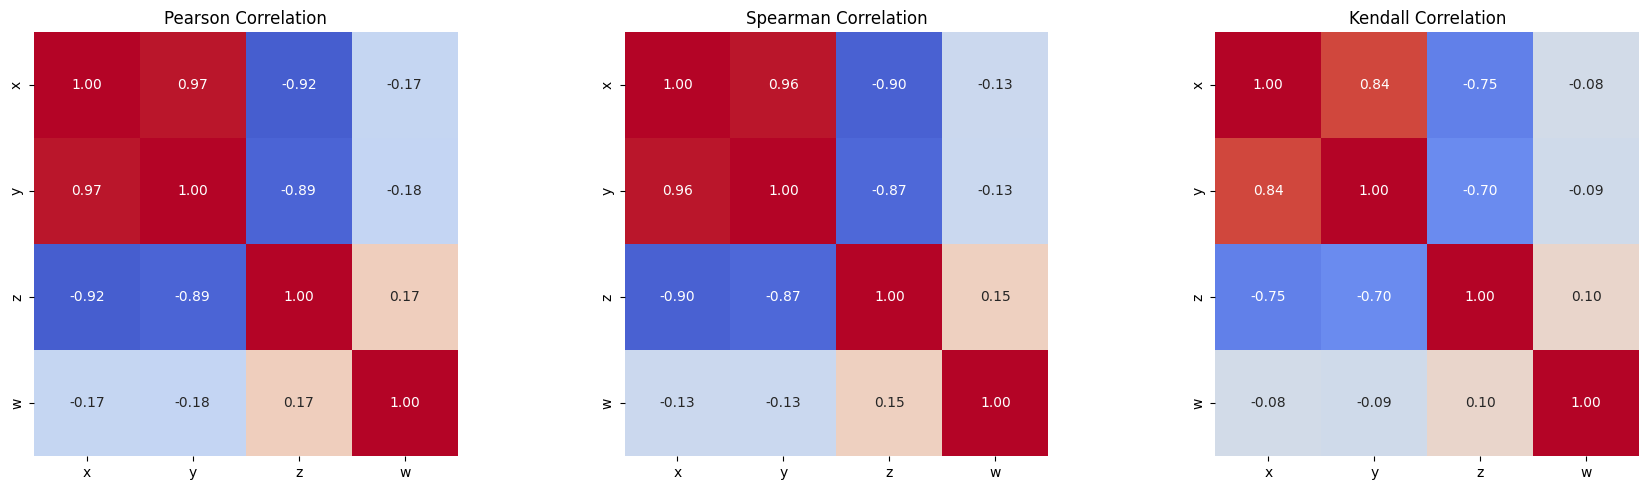

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_methods = {
    "Pearson": df.corr(method="pearson"),
    "Spearman": df.corr(method="spearman"),
    "Kendall": df.corr(method="kendall"),
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (title, corr) in zip(axes, corr_methods.items()):
    sns.heatmap(corr, ax=ax, cmap="coolwarm", vmin=-1, vmax=1, annot=True, fmt=".2f", square=True, cbar=False)
    ax.set_title(f"{title} Correlation")

fig.tight_layout()
plt.show()


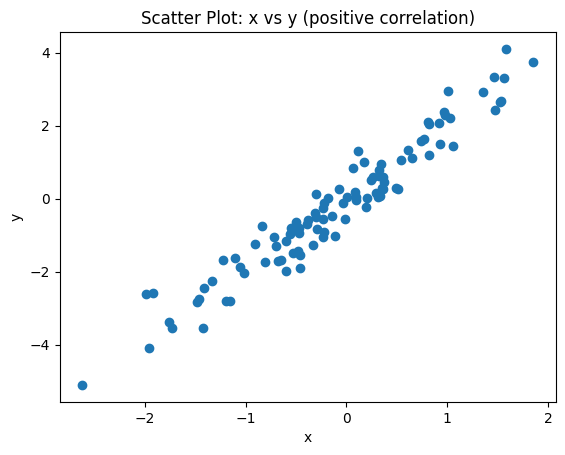

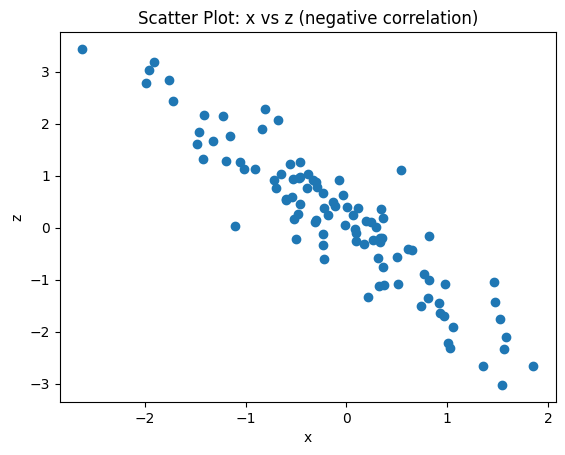

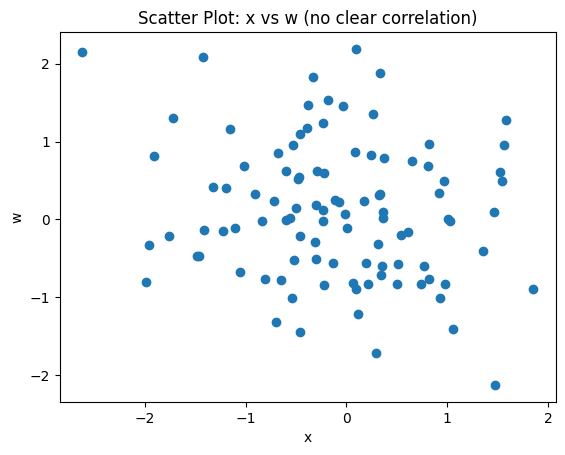

In [23]:
# Scatter plot: x vs y (positive correlation)
plt.figure()
plt.scatter(df["x"], df["y"])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter Plot: x vs y (positive correlation)")
plt.show()

# Scatter plot: x vs z (negative correlation)
plt.figure()
plt.scatter(df["x"], df["z"])
plt.xlabel("x")
plt.ylabel("z")
plt.title("Scatter Plot: x vs z (negative correlation)")
plt.show()

# Scatter plot: x vs w (no clear correlation)
plt.figure()
plt.scatter(df["x"], df["w"])
plt.xlabel("x")
plt.ylabel("w")
plt.title("Scatter Plot: x vs w (no clear correlation)")
plt.show()


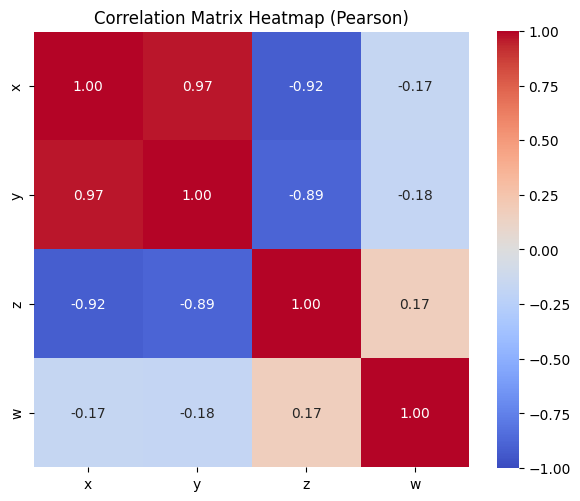

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr(method="pearson")

plt.figure(figsize=(6, 5))
sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    annot=True,
    fmt=".2f",
    square=True,
    cbar=True,
)
plt.title("Correlation Matrix Heatmap (Pearson)")
plt.tight_layout()
plt.show()


In [25]:
# Copy original data
df_with_outliers = df.copy()

# Add some extreme outliers to x and y
df_with_outliers.loc[0, "x"] = 8
df_with_outliers.loc[0, "y"] = 20

df_with_outliers.loc[1, "x"] = -7
df_with_outliers.loc[1, "y"] = -18

print("Pearson correlation (x, y) WITHOUT outliers:")
print(df["x"].corr(df["y"], method="pearson"))

print("\nPearson correlation (x, y) WITH outliers:")
print(df_with_outliers["x"].corr(df_with_outliers["y"], method="pearson"))


Pearson correlation (x, y) WITHOUT outliers:
0.9654943669720483

Pearson correlation (x, y) WITH outliers:
0.9814342413997696


Combined news + returns (all rows):
      date                               headline  sentiment_score    return
2025-12-23            Earnings beat lifts outlook              0.6  0.409671
2025-12-24                 CEO resigns amid probe             -0.5 -0.313826
2025-12-25         Product launch receives praise              0.5  0.364769
2025-12-26            Supply chain issues persist             -0.3 -0.027697
2025-12-29          Analyst upgrades stock to buy              0.7  0.396585
2025-12-30              Regulatory fine announced             -0.6 -0.383414
2025-12-31          New partnership expands reach              0.4  0.397921
2026-01-01                  Data breach disclosed             -0.7 -0.343257
2026-01-02              Dividend increased for Q4              0.6  0.313053
2026-01-05          Guidance cut after weak sales             -0.5 -0.245744
2026-01-06      Strong subscriber growth reported              0.5  0.253658
2026-01-07       Factory shutdown hits p

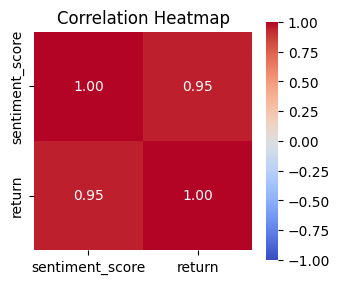

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# 20 business days ending today
dates = pd.date_range(end=pd.Timestamp.today().normalize(), periods=20, freq="B")

headlines = [
    "Earnings beat lifts outlook",
    "CEO resigns amid probe",
    "Product launch receives praise",
    "Supply chain issues persist",
    "Analyst upgrades stock to buy",
    "Regulatory fine announced",
    "New partnership expands reach",
    "Data breach disclosed",
    "Dividend increased for Q4",
    "Guidance cut after weak sales",
    "Strong subscriber growth reported",
    "Factory shutdown hits production",
    "Buyback program authorized",
    "Competition intensifies in core market",
    "Key patent upheld in court",
    "Cost-cutting plan unveiled",
    "Major client renewal secured",
    "Labor strike threatens shipments",
    "Revenue in line with consensus",
    "Pilot program shows early success",
]

sentiment_score = [
    0.6, -0.5, 0.5, -0.3, 0.7,
    -0.6, 0.4, -0.7, 0.6, -0.5,
    0.5, -0.4, 0.6, -0.2, 0.5,
    0.3, 0.4, -0.6, 0.1, 0.5,
]

news_df = pd.DataFrame({"date": dates, "headline": headlines, "sentiment_score": sentiment_score})

# Stock returns loosely driven by sentiment + noise
noise = np.random.normal(0, 0.1, size=len(dates))
returns = 0.6 * np.array(sentiment_score) + noise
returns_df = pd.DataFrame({"date": dates, "return": returns})

# Combine
combined = pd.merge(news_df, returns_df, on="date")

# Show combined table
with pd.option_context("display.max_rows", None, "display.max_colwidth", None):
    print("Combined news + returns (all rows):")
    print(combined.to_string(index=False))

# Correlation heatmap
corr = combined[["sentiment_score", "return"]].corr()
plt.figure(figsize=(3.5, 3))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, square=True, cbar=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()
